In [ ]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
World Development Indicators</p><br><br>
# Exploring Data Visualization Using Matplotlib

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('./datasets/Indicators.csv')
data.shape

(5656458, 6)

In [5]:
# use just coutries and indicators for these countries
countries = data['CountryName'].unique().tolist()
indicators = data['IndicatorName'].unique().tolist()

This is a really large dataset, at least in terms of the number of rows.  But with 6 columns, what does this hold?

In [6]:
data.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601


Looks like it has different indicators for different countries with the year and value of the indicator. 

We already saw how the USA's per-capita CO2 production related to other countries, let's see if we can find some more indicators in common between countries.  

To have some fun, we've picked countries randomly but then stored our random results so you can rerun it with the same answers.

In [7]:
# Filter 1 - use 5 years

# Picks years of choice
yearsFilter = [2010, 2011, 2012, 2013, 2014]

In [8]:
# Filter 2 - use 2 countries

# Pick 2 countries randomly
countryFilter = random.sample(countries, 2)

In [9]:
countryFilter

['Ecuador', 'Serbia']

In [10]:
# Filter 3 - use 1 indicator

# Pick 1 Indicator randomly
indicatorsFilter = random.sample(indicators, 1)
indicatorsFilter

['Population in the largest city (% of urban population)']

# Problem:  We're missing data.
# Not all countries have all indicators for all years

To solve this, we'll need to find two countries and two indicators for which we have data over this time range.

In [12]:
#for first country check whether it has indicator in the indicator list and for years in the range
filterMesh = (data['CountryName'] == countryFilter[0]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
#check every row and gets true/false according to the condition
filterMesh

'Ecuador'

In [13]:
#access the rows for which filterMesh is True
country1_data = data.loc[filterMesh]

In [14]:
# we got 5 rows - I assume for every year
len(country1_data)

5

In [15]:
#same with the second country
filterMesh = (data['CountryName'] == countryFilter[1]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
country2_data = data.loc[filterMesh]

In [17]:
#5 rows too - I assume for every year
len(country2_data)

5

# So let's pick indicators and countries which have data over this time range

The code below will randomly pick countries and indicators until it finds two countries who have data for an indicator over this time frame. We used it to produce the fixed values you see later, feel free to play with this yourself!

In [18]:
filteredData1 = []
filteredData2 = []

In [19]:
'''
Plot: 
countryFilter:    pick two countries, 
indicatorsFilter: pick an indicator, 
yearsFilter: plot for years in yearsFilter
'''
#I have it for previous example but never mind I will do that again
# problem - not all countries have all indicators so if you go to visualize, it'll have missing data.
# randomly picking two indicators and countries, do these countries have valid data over those years.
# brings up the discussion of missing data/ missing fields
# until we find full data

while(len(filteredData1) < len(yearsFilter)-1):
    # pick new indicator
    indicatorsFilter = random.sample(indicators, 1)
    countryFilter    = random.sample(countries, 2)
    # how many rows are there that have this country name, this indicator, and this year.  Mesh gives bool vector
    filterMesh = (data['CountryName'] == countryFilter[0]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
    # which rows have this condition to be true?
    filteredData1 = data.loc[filterMesh]
    filteredData1 = filteredData1[['CountryName','IndicatorName','Year','Value']]

    # need to print this only when our while condition is true
    if(len(filteredData1) < len(yearsFilter)-1):
        print('Skipping ... %s since very few rows (%d) found' % (indicatorsFilter, len(filteredData1)))


Skipping ... ['Children in employment, self-employed (% of children in employment, ages 7-14)'] since very few rows (0) found


In [20]:
# What did we pick eventually ?
indicatorsFilter

['Land under cereal production (hectares)']

In [21]:
len(filteredData1)

4

In [22]:
'''
Country 2
'''

while(len(filteredData2) < len(filteredData1)-1):
    filterMesh = (data['CountryName'] == countryFilter[1]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
    filteredData2 = data.loc[filterMesh]
    filteredData2 = filteredData2[['CountryName','IndicatorName','Year','Value']]
    #pick new indicator
    old = countryFilter[1]
    countryFilter[1]    = random.sample(countries, 1)[0]
    
    if(len(filteredData2) < len(filteredData1)-1):
        print('Skipping ... %s, since very few rows (%d) found' % (old, len(filteredData2)))

In [23]:
if len(filteredData1) < len(filteredData2):
    small = len(filteredData1)
else:
    small = len(filteredData2)

In [24]:
filteredData1=filteredData1[0:small]
filteredData2=filteredData2[0:small]

In [25]:
filteredData1

,CountryName,IndicatorName,Year,Value
4854877,Middle income,Land under cereal production (hectares),2010,4.378877e+08
5040847,Middle income,Land under cereal production (hectares),2011,4.409476e+08
5216989,Middle income,Land under cereal production (hectares),2012,4.381359e+08
5390860,Middle income,Land under cereal production (hectares),2013,4.519984e+08


In [26]:
filteredData2

,CountryName,IndicatorName,Year,Value
5019958,Uzbekistan,Land under cereal production (hectares),2010,1635300.0
5196480,Uzbekistan,Land under cereal production (hectares),2011,1491943.0
5371603,Uzbekistan,Land under cereal production (hectares),2012,1599831.0
5528891,Uzbekistan,Land under cereal production (hectares),2013,1616569.0


<br><p style="font-family: Arial; font-size:2.75em;color:blue; font-style:bold">
Matplotlib: Additional Examples</p><br>

## Example: Scatter Plot

Now that we have the data for two countries for the same indicators, let's plot them using a scatterplot.

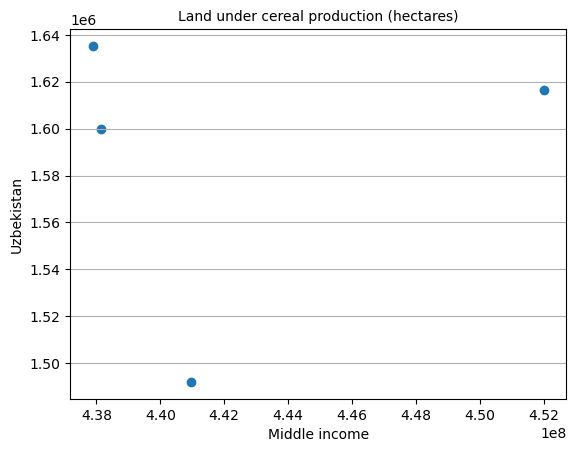

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title(indicatorsFilter[0],fontsize=10) #for first indicator
axis.set_xlabel(filteredData1['CountryName'].iloc[0],fontsize=10) #first country
axis.set_ylabel(filteredData2['CountryName'].iloc[0],fontsize=10) #second country - label is wrong??

#on X and Y will be value for property Value from apropriate dataframe
X = filteredData1['Value']
Y = filteredData2['Value']

axis.scatter(X, Y)

## Example: Line Plot

Here we'll plot the indicator over time for each country.

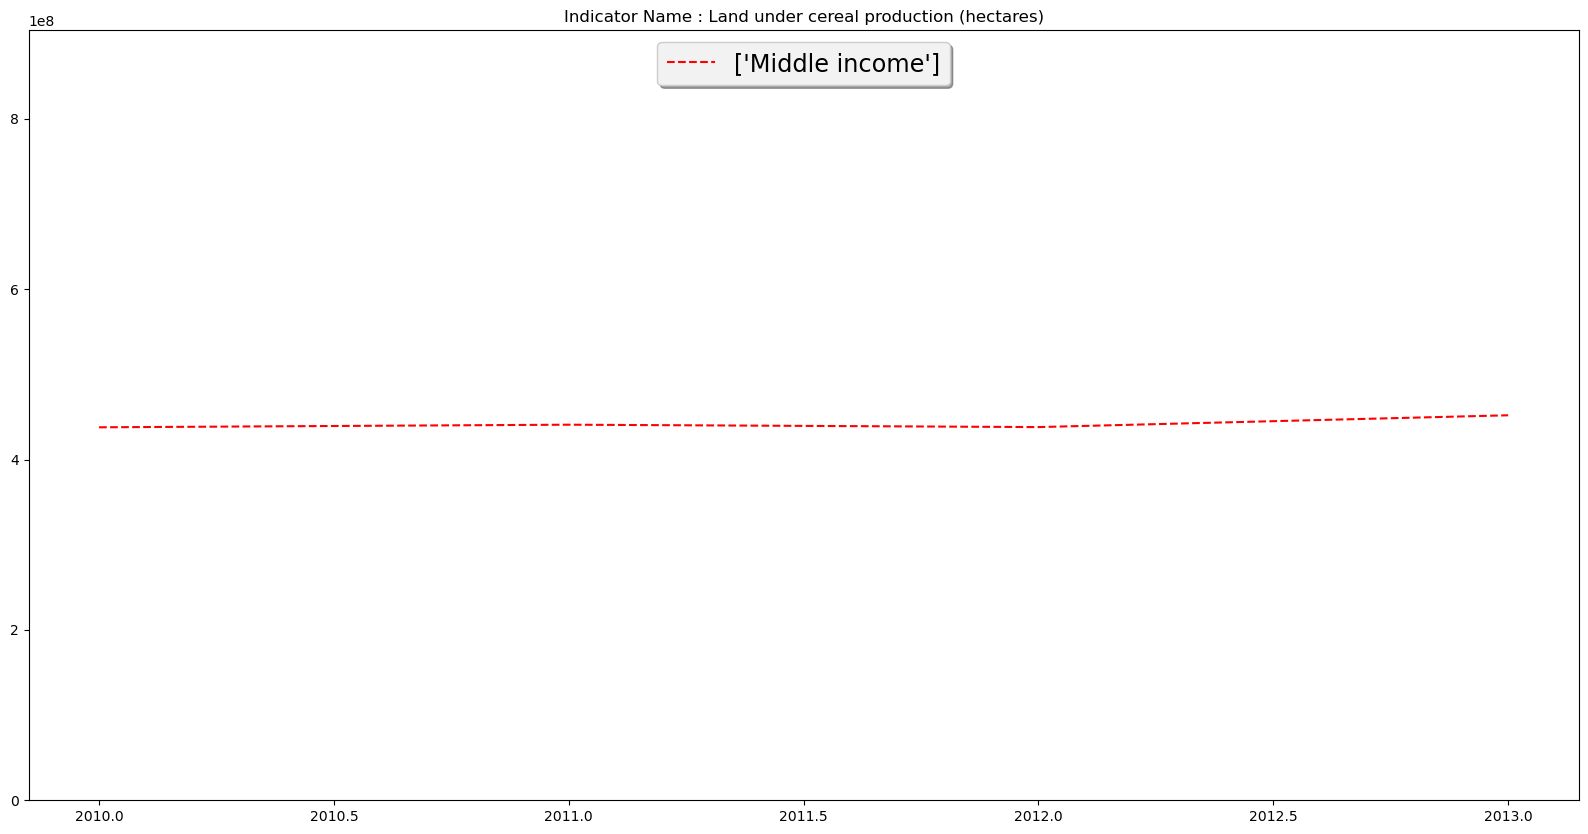

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_ylim(min(0,filteredData1['Value'].min()), 2*filteredData1['Value'].max())
ax.set_title('Indicator Name : ' + indicatorsFilter[0])
ax.plot(filteredData1['Year'], filteredData1['Value'] , 'r--', label=filteredData1['CountryName'].unique()) 

# Add the legend
legend = plt.legend(loc = 'upper center', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

## Let's plot country #2

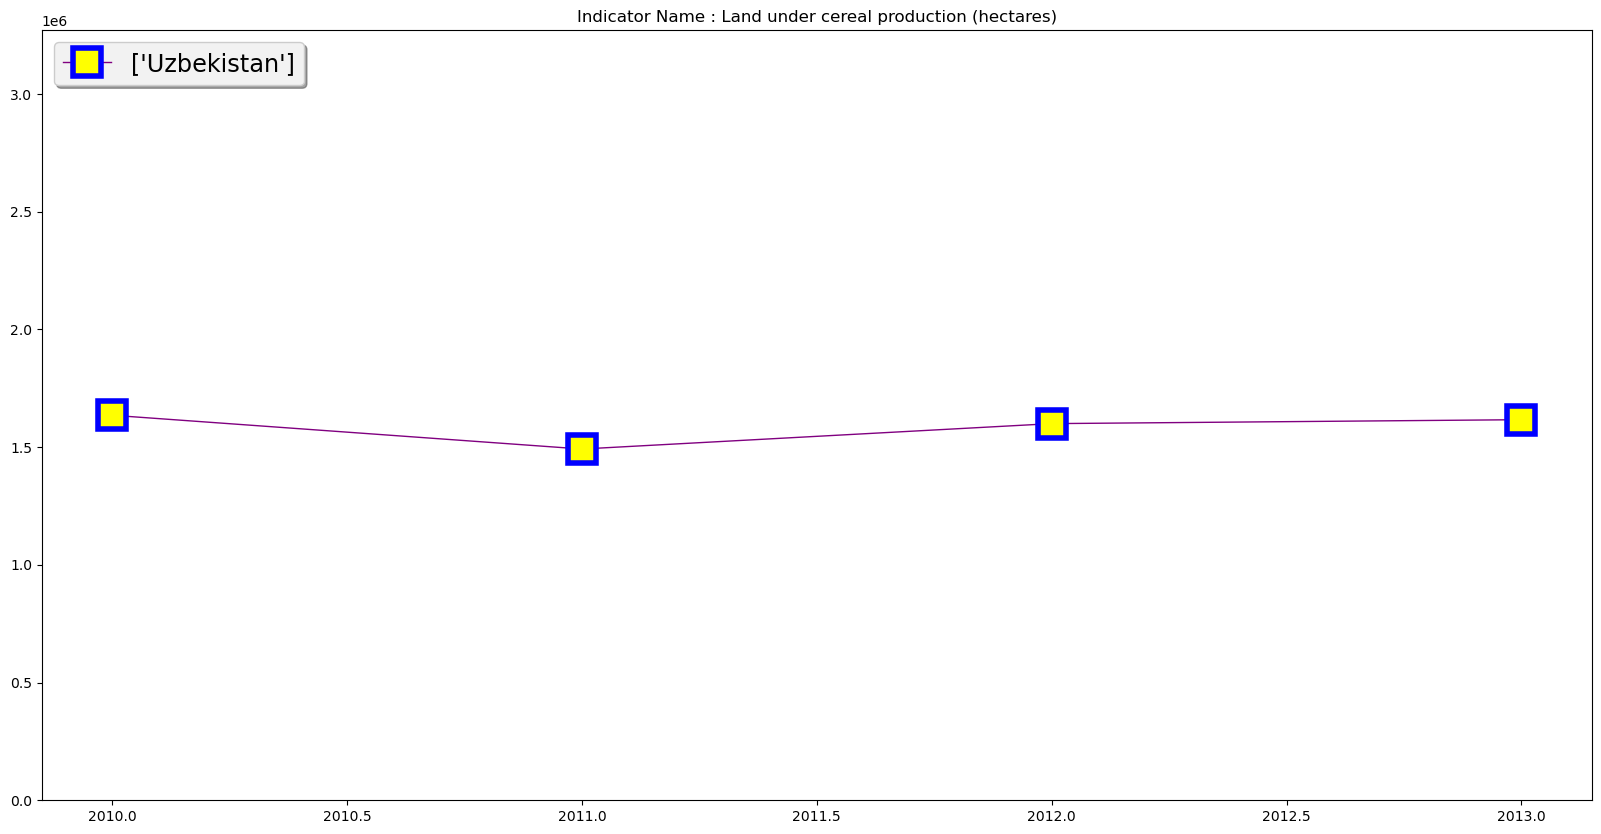

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))

# Adjust the lower and upper limit to bring the graph at center
ax.set_ylim(min(0,filteredData2['Value'].min()), 2*filteredData2['Value'].max())

ax.set_title('Indicator Name : ' + indicatorsFilter[0])
ax.plot(filteredData2['Year'], filteredData2['Value'] ,
         label=filteredData2['CountryName'].unique(),
         color="purple", lw=1, ls='-', 
         marker='s', markersize=20, 
         markerfacecolor="yellow", markeredgewidth=4, markeredgecolor="blue") 

# Add the legend
legend = plt.legend(loc = 'upper left', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

# Example (random datasets)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

countof_angles = 36
countof_radii  = 8

# array - radii
array_rad = np.linspace(0.125, 1.0, countof_radii)

# array - angles
array_ang = np.linspace(0, 2*np.pi, countof_angles, endpoint=False)

# repeat all angles per radius
array_ang = np.repeat(array_ang[...,np.newaxis], countof_radii, axis=1)

# from polar (radii, angles) coords to cartesian (x, y) coords
x = np.append(0, (array_rad*np.cos(array_ang)).flatten())
y = np.append(0, (array_rad*np.sin(array_ang)).flatten())

# saddle shaped surface
z = np.sin(-x*y)

fig = plt.figure(figsize=(20,10))
ax  = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, cmap=cm.autumn, linewidth=0.2)

plt.show()
fig.savefig("vis_3d.png")

# Example (random dataset)

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

n_points = 200

radius   = 2 * np.random.rand(n_points)
angles   = 2 * (np.pi) * np.random.rand(n_points)
area     = 400 * (radius**2) * np.random.rand(n_points)

colors = angles

fig = plt.figure(figsize=(20,10))
ax  = plt.subplot(111, polar=True)

c = plt.scatter(angles, radius, c=colors, s=area, cmap=plt.cm.hsv)
c.set_alpha(1.95)

plt.show()
fig.savefig("vis_bubbleplot.png")

# Example 4: Box Plots (random datasets)

In [ ]:
np.random.seed(452)

# Three ararys of 100 points each
A1 = np.random.normal(0, 1, 100)
A2 = np.random.normal(0, 2, 100)
A3 = np.random.normal(0, 1.5, 100)

# Concatenate the three arrays
data = [ A1, A2, A3 ]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))


# Box plot: Notch Shape
bplot1 = axes[1].boxplot(data,
                         notch=True,  
                         vert=True,           # vertical aligmnent
                         patch_artist=True)   # color

# Box plot: Rectangular 
bplot2 = axes[0].boxplot(data,
                         vert=True,           # vertical aligmnent
                         patch_artist=True)   # color




colors = ['tomato', 'darkorchid', 'lime']
# more colors here: http://matplotlib.org/examples/color/named_colors.html

for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# Grid lines, Xticks, Xlabel, Ylabel
for axis in axes:
    axis.yaxis.grid(True)
    axis.set_xticks([y for y in range(len(data))], )
    axis.set_xlabel('Sample X-Label',fontsize=20)
    axis.set_ylabel('Sample Y-Label',fontsize=20)

    
# Xtick labels
plt.setp(axes, xticks=[y for y in range(len(data))],
         xticklabels=['X1', 'X2', 'X3'])

plt.show()
fig.savefig("vis_boxplot.png")

## Want more ? 

### Matplotlib Examples Library

http://matplotlib.org/examples/index.html